In [2]:
import yfinance as yf
import mplfinance as mpf 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ticker = "BX"
data = yf.download(ticker, start="2021-01-01", end="2024-01-1")
data.reset_index(drop = True, inplace = True)
data.index = data.index + 1
data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BX,BX,BX,BX,BX
1,54.185383,55.991561,53.505915,55.905554,3255800
2,54.021973,54.443413,53.540324,53.652136,2758600
3,53.032864,53.987559,52.697431,53.600520,5090700
4,54.383194,54.632619,53.617719,53.763931,2368300
5,54.099369,55.062660,53.333890,54.830440,2396700
...,...,...,...,...,...
749,126.349747,127.693584,124.947905,125.431299,3342400
750,127.007156,127.625901,126.011364,126.330407,2485000
751,128.205978,128.998738,126.243397,126.717129,3561200


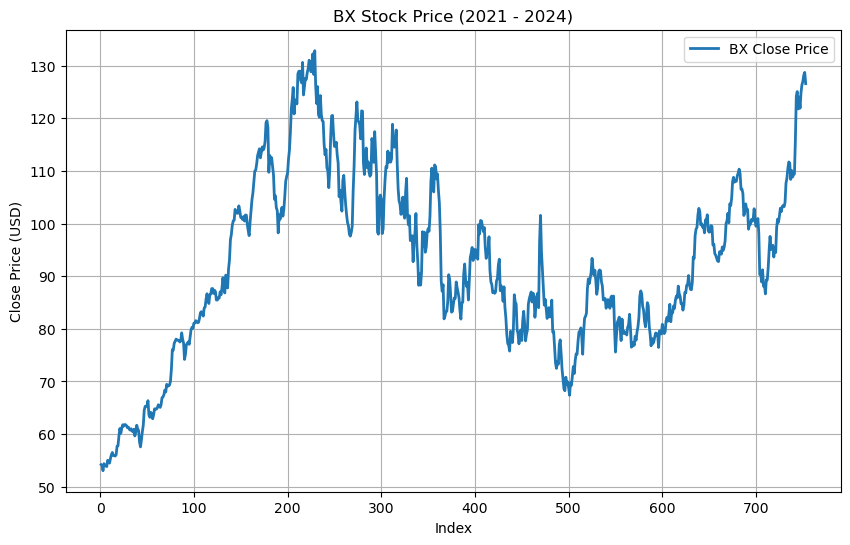

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='BX Close Price', linewidth=2)
plt.title('BX Stock Price (2021 - 2024)')
plt.xlabel('Index')
plt.ylabel('Close Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed


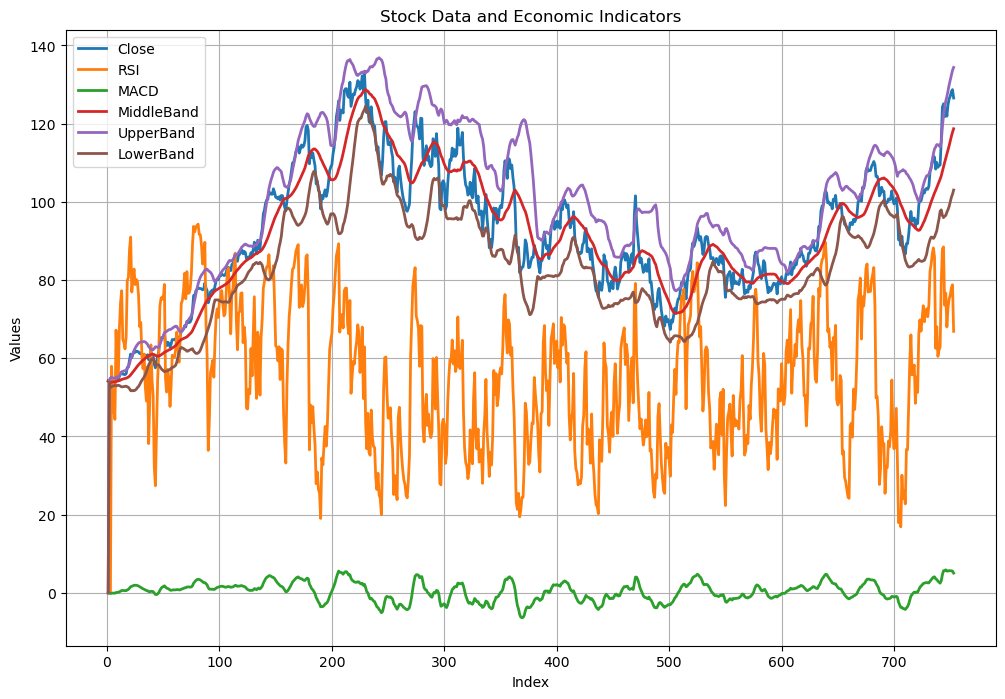

In [5]:
ticker = "BX"
data = yf.download(ticker, start="2021-01-01", end="2024-01-1")
data.reset_index(drop = True, inplace = True)
data.index = data.index + 1
macro = pd.read_csv("macro.csv")
macro.index = macro.index + 1
#Functions for technical indi
def RSI(data, period):
    delta = data["Close"].diff()
    gain = delta.where(delta > 0, 0.0)
    loss = -delta.where(delta < 0, 0.0)
    avg_gain = gain.ewm(span=period, adjust=False).mean()
    avg_loss = loss.ewm(span=period, adjust=False).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def EMA(data, period):
    return data["Close"].ewm(span = period, adjust = False).mean()

def MACD(data, short_period = 5, long_period = 17, signal_period = 9): 
    ema_short = EMA(data, short_period)
    ema_long = EMA(data, long_period)
    macd = ema_short - ema_long
    signal = macd.ewm(span=signal_period, adjust=False).mean()
    data["MACD"] = macd
    data["Signal"] = signal
    return data 

def Bollinger_Bands(data, period = 20, std_multiplier = 2):
    middle_band = data["Close"].rolling(window=period, min_periods=1).mean()
    std = data["Close"].rolling(window=period, min_periods=1).std()
    upper_band = middle_band + (std_multiplier * std)
    lower_band = middle_band - (std_multiplier * std)
    data["MiddleBand"] = middle_band
    data["UpperBand"] = upper_band
    data["LowerBand"] = lower_band
    data["MiddleBand"] = data["MiddleBand"].fillna(0)
    data["UpperBand"] = data["UpperBand"].fillna(0)
    data["LowerBand"] = data["LowerBand"].fillna(0)
    return data


rsi_values = RSI(data, period=14)
data["RSI"] = rsi_values
data = MACD(data, short_period=7, long_period=17, signal_period=9)
data = Bollinger_Bands(data, period=20, std_multiplier=2)
data.columns = data.columns.droplevel(1)
data_final = data.join(macro)
columns_to_plot = ['Close', 'RSI', 'MACD', 'MiddleBand', 'UpperBand', 'LowerBand']
plt.figure(figsize=(12, 8))

for col in columns_to_plot:
    plt.plot(data_final[col], label=col, linewidth=2)

plt.title('Stock Data and Economic Indicators')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
data_macro = pd.read_csv("macro.csv")
data_macro

,GDP,IPOs,M&A_Activities,FFR_rate
0,21058.379,118,435739,0.09
1,21058.379,118,435739,0.09
2,21058.379,118,435739,0.09
3,21058.379,118,435739,0.09
4,21058.379,118,435739,0.09
...,...,...,...,...
748,22960.600,7,299822,5.33
749,22960.600,7,299822,5.33
750,22960.600,7,299822,5.33
751,22960.600,7,299822,5.33


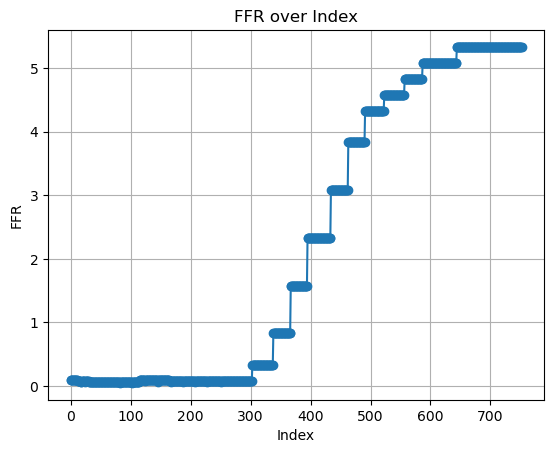

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure()
plt.plot(data_macro.index, data_macro['FFR_rate'], marker='o')
plt.xlabel('Index')
plt.ylabel('FFR')
plt.title('FFR over Index')
plt.grid(True)
plt.show()